In [141]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import csv
%matplotlib notebook


def read_arduino(ser,inputBufferSize):
#    data = ser.readline(inputBufferSize)
    data = ser.read(inputBufferSize)
    out =[(int(data[i])) for i in range(0,len(data))]
    return out

def process_data(data):
    data_in = np.array(data)
    result = []
    i = 1
    while i < len(data_in)-1:
        if data_in[i] > 127:
            # Found beginning of frame
            # Extract one sample from 2 bytes
            intout = (np.bitwise_and(data_in[i],127))*128
            i = i + 1
            intout = intout + data_in[i]
            result = np.append(result,intout)
        i=i+1
    return result

In [142]:
# use this to find ports
from serial.tools import list_ports

ports = list_ports.comports()
for port in ports:
    print(port)

/dev/cu.HC-05-DevB - n/a
/dev/cu.JustinsAirPods-Wireless - n/a
/dev/cu.BLAST-Port - n/a
/dev/cu.JustinsiPhone-Wirelessi - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem14101 - Arduino Leonardo


<IPython.core.display.Javascript object>


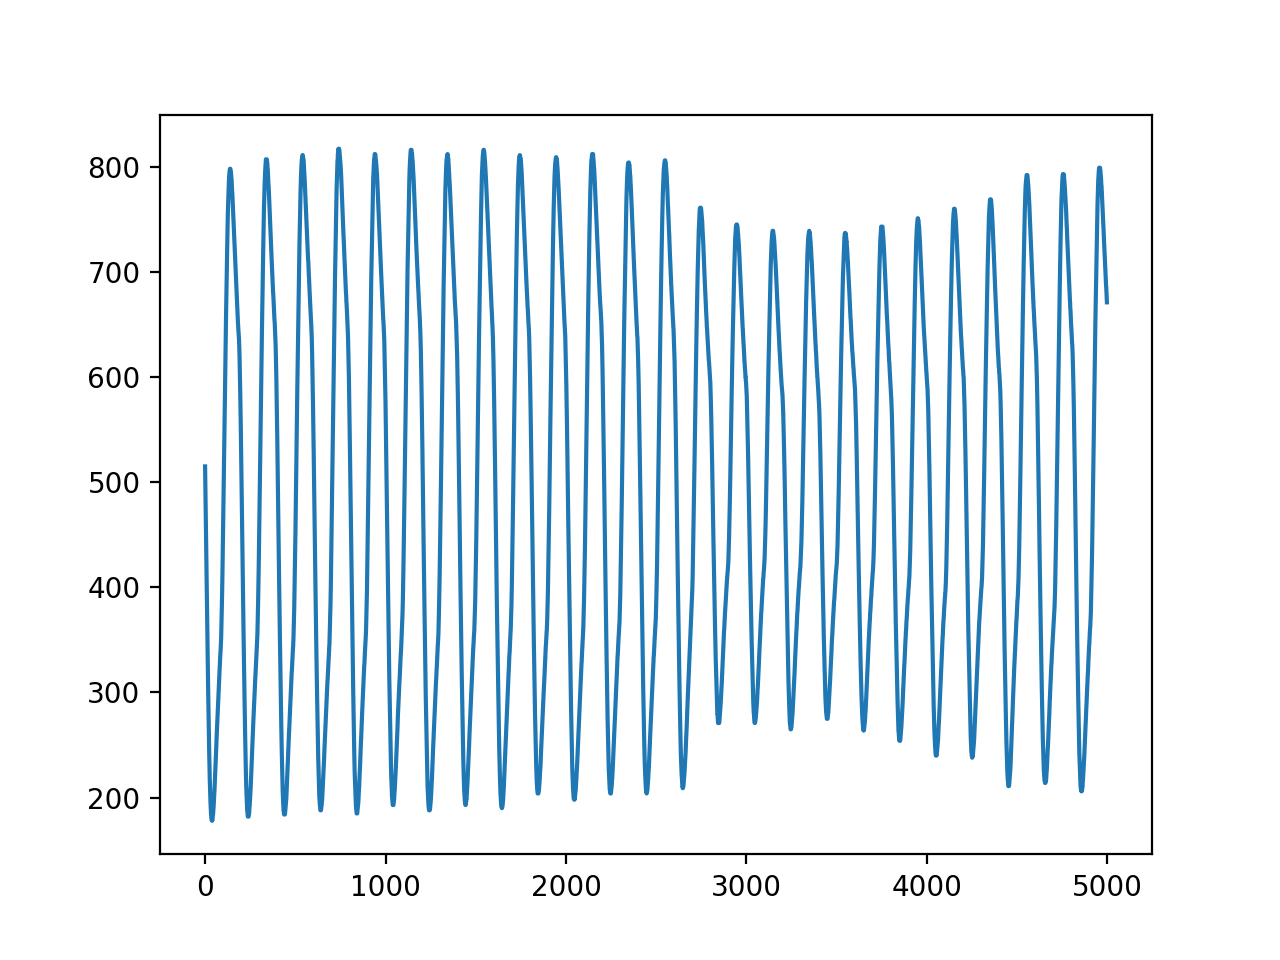

In [174]:
# Read example data
baudrate = 230400
cport = '/dev/cu.usbmodem14101'  # set the correct port before you run it
#cport = "/dev/cu.usbserial-DJ00E2W2"
#cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)    
# take example data
inputBufferSize = 10000 # 20000 = 1 second
ser.timeout = inputBufferSize/20000.0  # set read timeout
#ser.set_buffer_size(rx_size = inputBufferSize)
data = read_arduino(ser,inputBufferSize)
data_plot = process_data(data)
plt.figure()
plt.plot(data_plot)
plt.show()
 

<IPython.core.display.Javascript object>


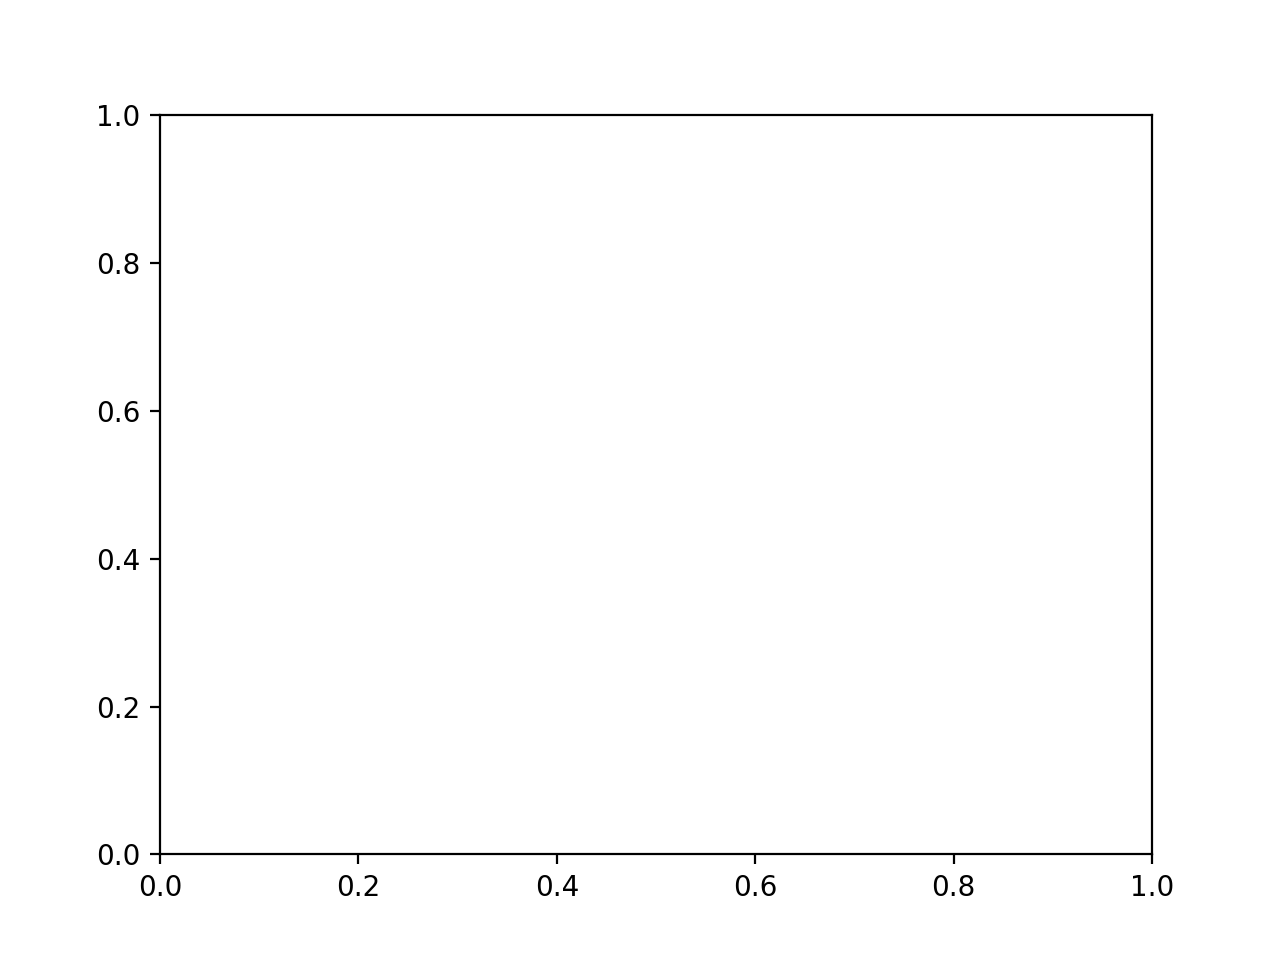

In [144]:
# this initializes the animated plot
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()



In [175]:
# Generate training set of directions
length = 12
actions = ""
for i in range(0,11):
    action_index = random.randint(0, 3)
    if action_index == 0:
        actions = actions + "Left,"
    elif action_index == 1:
        actions = actions + "Right,"
    elif action_index == 2:
        actions = actions + "Blink,"
    elif action_index == 3:
        actions = actions + "Double Blink,"
        
print(actions) 

Double Blink,Right,Blink,Blink,Left,Right,Blink,Left,Double Blink,Left,Left,


Double Blink,Right,Blink,Blink,Left,Right,Blink,Left,Double Blink,Left,Left,


<IPython.core.display.Javascript object>


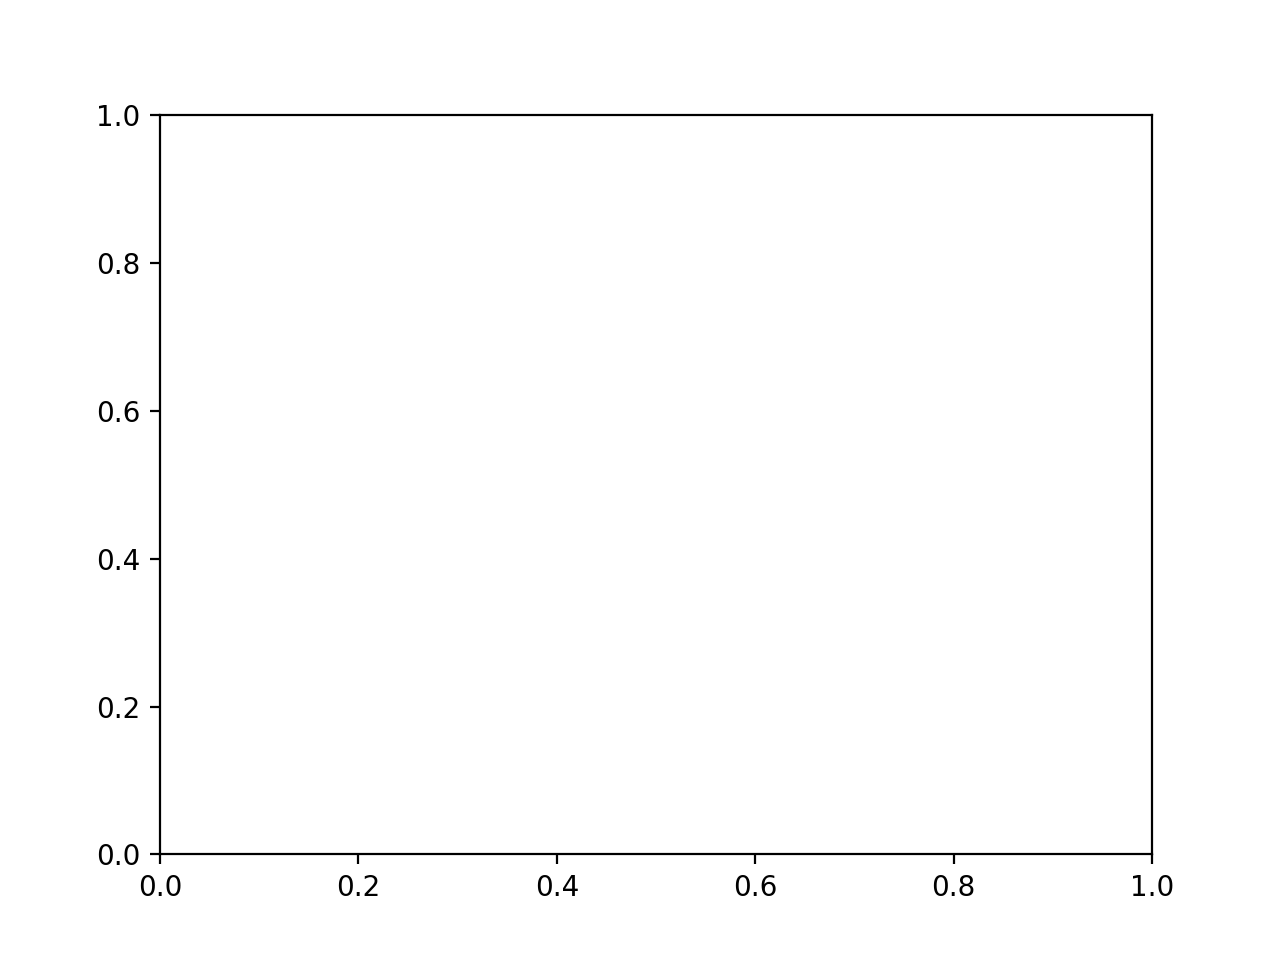

In [176]:
# take continuous data stream 
inputBufferSize = 10000 # keep betweein 2000-20000
ser.timeout = inputBufferSize/20000.0  # set read timeout, 20000 is one second
#this is the problem line on the mac
# ser.set_buffer_size(rx_size = inputBufferSize)

#%matplotlib notebook

print(actions)

total_time = 2*60.0; # time in seconds [[1 s = 20000 buffer size]]
max_time = 10.0; # time plotted in window [s]
N_loops = 20000.0/inputBufferSize*total_time

T_acquire = inputBufferSize/20000.0    # length of time that data is acquired for 
N_max_loops = max_time/T_acquire    # total number of loops to cover desire time window

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.ion()
fig.show()
fig.canvas.draw()

count = 0

for k in range(0,int(N_loops)):
    data = read_arduino(ser,inputBufferSize)
    data_temp = process_data(data)
    if k==0:
        data_plot = data_temp
    else:
        data_plot = np.append(data_plot,data_temp) 
    t = (min(k+1,N_loops))*inputBufferSize/20000.0*np.linspace(0,1,(data_plot).size)
    

    
#    plt.xlim([0,max_time])
#    ax1.clear()
#    ax1.set_xlim(0, max_time)
#    plt.xlabel('time [s]')
#    ax1.plot(t,data_plot)
#    fig.canvas.draw()    
#    plt.show()

In [170]:
# close serial port if necessary
if ser.read():
    ser.flushInput()
    ser.flushOutput()
    ser.close()

In [107]:
print(t)

[0.00000000e+00 1.00020087e-04 2.00040175e-04 ... 1.19999800e+02
 1.19999900e+02 1.20000000e+02]


In [62]:
with open("training_set.txt","w+") as f:
    for i in range(1,len(data_plot)):
        f.write(str(data_plot[i])+",")

<IPython.core.display.Javascript object>


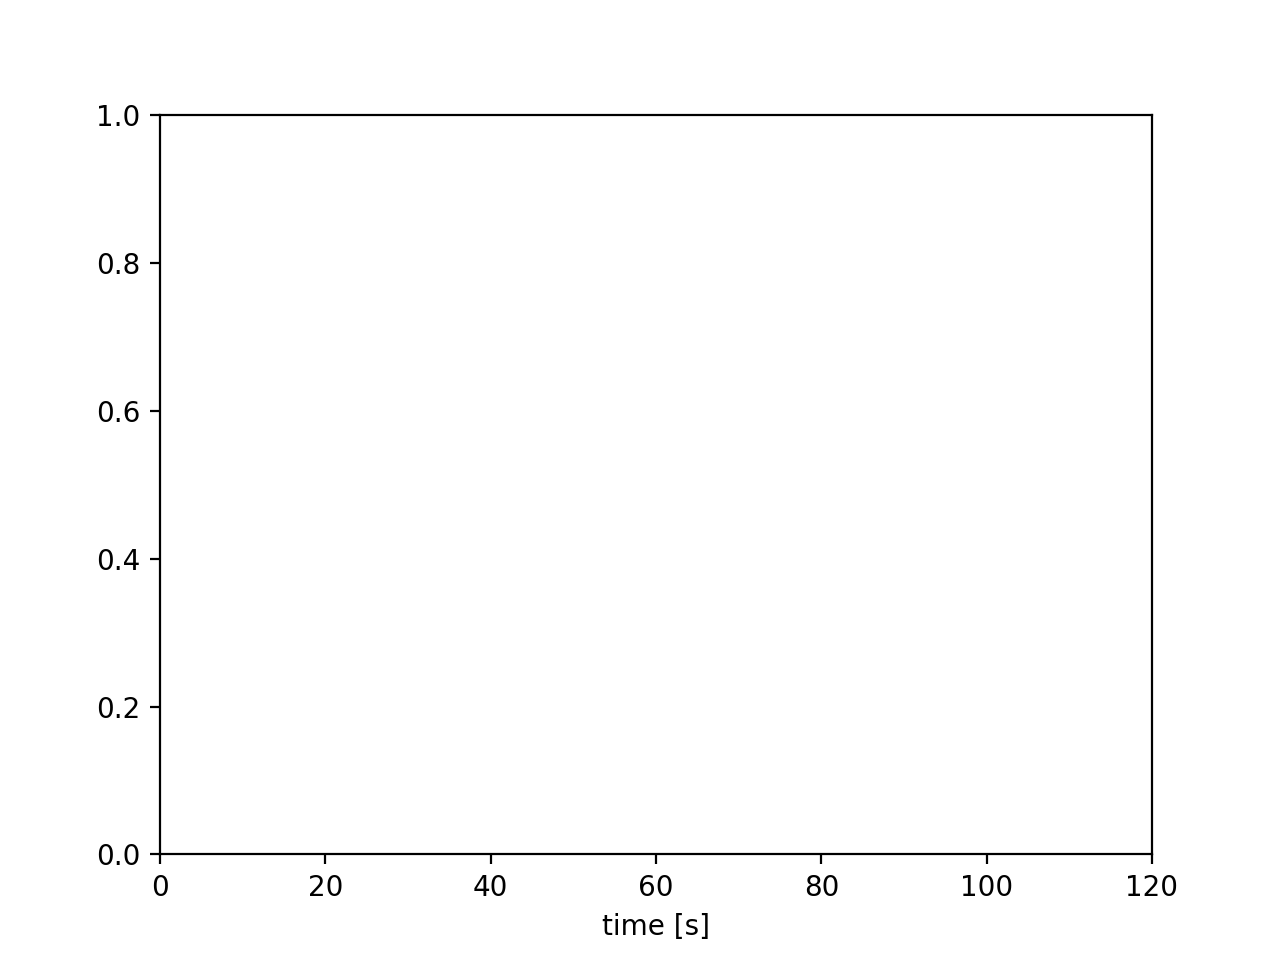

In [148]:
%matplotlib notebook

plt.xlim([0,total_time])
ax1.clear()
ax1.set_xlim(0, total_time)
plt.xlabel('time [s]')
ax1.plot(range(0,len(data_plot)),data_plot)
fig.canvas.draw()    
plt.show()

In [171]:
print(data_plot)

[758. 771. 784. ... 423. 451. 479.]


In [177]:
with open('training_set_10.csv', 'w+', newline='') as csvfile:
    setwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(0,len(data_plot)-1):
        setwriter.writerow(str(data_plot[i]))

In [178]:
with open('training_set_instructions_10.csv', 'w+', newline='') as csvfile:
    instructionwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    instructionwriter.writerow(actions)